In [6]:
-- 1. NULL értékek száma az egyes oszlopokban
SELECT 
    SUM(CASE WHEN LISTAAR IS NULL OR LISTAAR = 0 THEN 1 ELSE 0 END) AS 'Nincs árazva',
    SUM(CASE WHEN KESZLET IS NULL OR KESZLET = 0 THEN 1 ELSE 0 END) AS 'Nincs készleten',
    SUM(CASE WHEN LEIRAS IS NULL THEN 1 ELSE 0 END) AS 'Nincs leírása',
    SUM(CASE WHEN KAT_ID IS NULL THEN 1 ELSE 0 END) AS 'Kategorizálatlan',
    SUM(CASE WHEN RAKTAR_KOD IS NULL THEN 1 ELSE 0 END) AS 'Hiányzó raktárkód'
FROM Termek;

(1 row affected)

Total execution time: 00:00:00.019

Nincs árazva,Nincs készleten,Nincs leírása,Kategorizálatlan,Hiányzó raktárkód
1,2,527,0,0


Megfigyelhető volt, hogy nem volt elég sima IS NULL szűrés, mivel van például 0 listaárú termék is.

In [2]:
-- 2. Min, Max, Átlag számítása
SELECT 
    MIN(LISTAAR) AS 'Legkisebb listaárunk',
    MAX(LISTAAR) AS 'Legnagyobb listaárunk',
    ROUND(AVG(LISTAAR), 0) AS 'Átlag listaárunk',
    MIN(KESZLET) AS 'Legkisebb készletszámunk',
    MAX(KESZLET) AS 'Legnagyobb készletszámunk',
    ROUND(AVG(KESZLET), 0) AS 'Árlagos készletszámunk'
FROM Termek;

(1 row affected)

Total execution time: 00:00:00.020

Legkisebb listaárunk,Legnagyobb listaárunk,Átlag listaárunk,Legkisebb készletszámunk,Legnagyobb készletszámunk,Árlagos készletszámunk
0,46000,786,0,50000,1586


In [5]:
-- 3. 5 leggyakoribb árú termékünk
SELECT TOP 5 LISTAAR, COUNT(*) AS 'Gyakoriság'
FROM Termek
GROUP BY LISTAAR
ORDER BY 2 DESC;

(5 rows affected)

Total execution time: 00:00:00.019

LISTAAR,Gyakoriság
30,16
44,16
89,15
15,14
103,12


In [11]:
-- 4. Az 5 legnagyobb készlettel rendelkező termékek
SELECT TOP 5 TERMEKKOD, MEGNEVEZES, KESZLET
FROM Termek
ORDER BY KESZLET DESC

(5 rows affected)

Total execution time: 00:00:00.051

TERMEKKOD,MEGNEVEZES,KESZLET
03050457T,Ajándék cs. tasak kicsi,50000
07080471T,Golyóstoll levélbontós,50000
03050079T,Díszkötöző szalag vékony,40000
07080469T,Golyóstoll UNIBALL 07,35000
07080164T,Golyóstoll UNI gumis,30000


In [15]:
-- 5. Kiugró értékek keresése a Ár szerint
SELECT *
FROM Termek
WHERE LISTAAR = (SELECT MAX(LISTAAR) FROM Termek)
   OR LISTAAR = (SELECT MIN(LISTAAR) FROM Termek);

(2 rows affected)

Total execution time: 00:00:01.032

TERMEKKOD,MEGNEVEZES,KAT_ID,LISTAAR,LEIRAS,RAKTAR_KOD,KESZLET,MEGYS,FELVITTE,FELVITEL
07030108T,Filctoll CD író,41,0,NULL,5,500,db,Mari,2016-07-21
N039-AL222,kosztüm (hosszú),88,46000,tört fehér,2,238,db,Mari,2016-07-20


In [7]:
-- 6. Az egyes raktárakban található termékek száma
SELECT RAKTAR_KOD,
       COUNT(*) AS termek_szam
FROM Termek
GROUP BY RAKTAR_KOD
ORDER BY termek_szam DESC;

(9 rows affected)

Total execution time: 00:00:00.039

RAKTAR_KOD,termek_szam
8,123
6,106
9,102
7,100
5,86
3,14
1,11
2,5
4,4


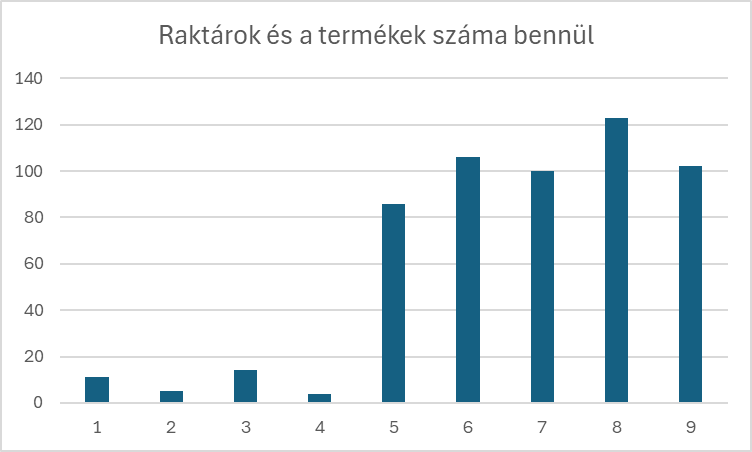